$$Diego \space Castillo \space Reyes$$
<h1 align="center">KNN cuántico</h1>

Clasificar los números del 0 al 7

0, ..., 3 $\rightarrow$ 0

4, ..., 7 $\rightarrow$ 1

In [94]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [95]:
n = int(input("Ingrese el número a clasificar: "))

# transform to binary the number to add in the quantum circuit
n = format(n, '03b')
print(n)

100


In [96]:
# define the device
dev = qml.device("default.qubit", wires=8)

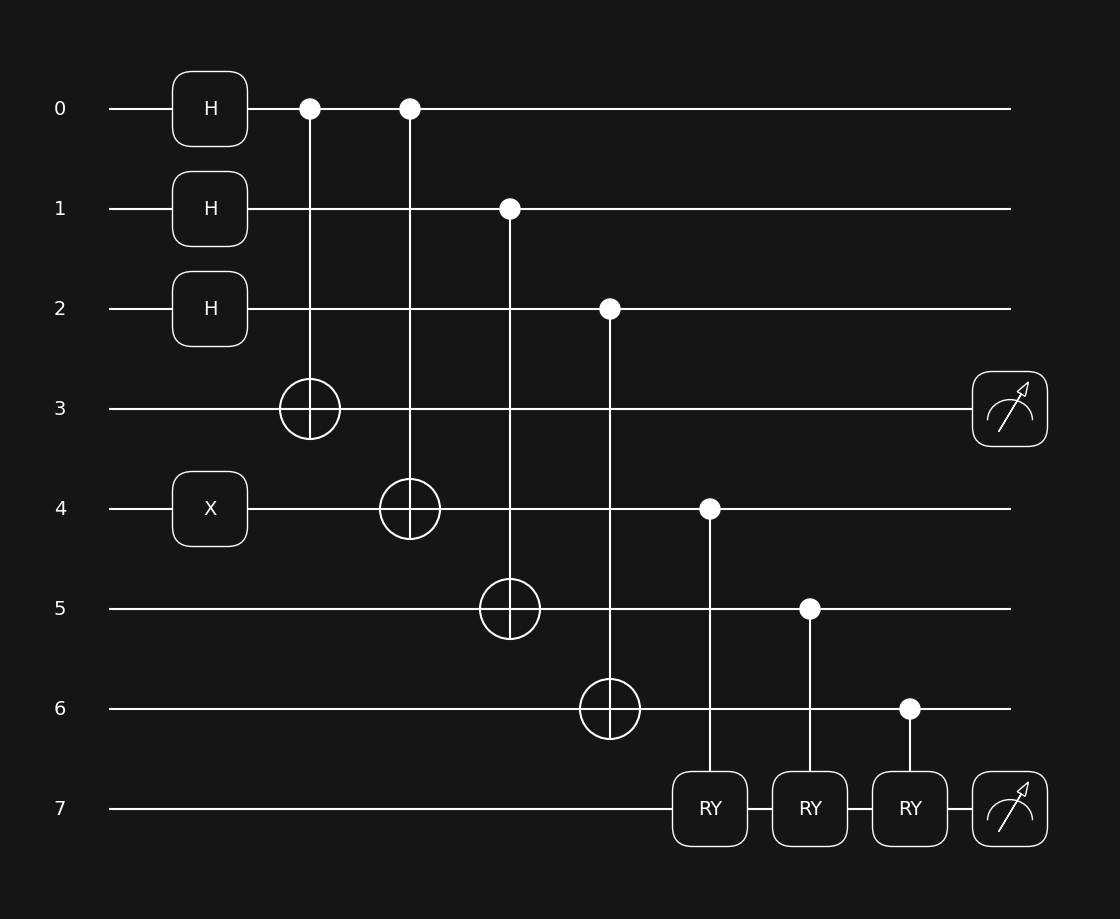

In [97]:
# define the quatum circuit
@qml.qnode(dev)
def circuit(n):
    # create the superposition
    for i in range(3):
        qml.Hadamard(wires=i)

    # set the labels
    qml.CNOT(wires=[0, 3])

    # set the number to classify
    for i, bit in enumerate(n):
        if bit == '1':
            qml.PauliX(wires=i + 4)

    # CNOT between the dataset and the num to classify
    for i in range(3):
        qml.CNOT(wires=[i, i + 4])
    
    # return qml.state()

    # apply the CRY gates
    for i in range(4, 7):
        qml.CRY(np.pi / 8, wires=[i, 7])

    # measure 4th and the 8th qubit
    return qml.probs(wires=[3, 7])


# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(n)
plt.show()

In [98]:
# run the circuit
prediction = circuit(n)

# print(prediction)

# format the prediction
max = np.argmax(prediction)
if max == 0:
    print("El numero pertenece a la clase 0")
elif max == 2:
    print("El numero pertenece a la clase 1")

El numero pertenece a la clase 1
